# 0) Imports

In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


# 1) Getting data

In [2]:
train_data = MNIST(root='data',
                   train=True,
                   download=True,
                   transform=transforms.ToTensor(),
                   target_transform=None
                   )

test_data = MNIST(root='data',
                  train=False,
                  download=True,
                  transform=transforms.ToTensor(),
                  target_transform=None
                  )

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 489kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.95MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.09MB/s]


In [3]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [4]:
print(len(train_data))
print(len(test_data))


60000
10000


In [5]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [6]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [7]:
image.shape

torch.Size([1, 28, 28])

## Visualizing Data

Text(0.5, 1.0, '5 - five')

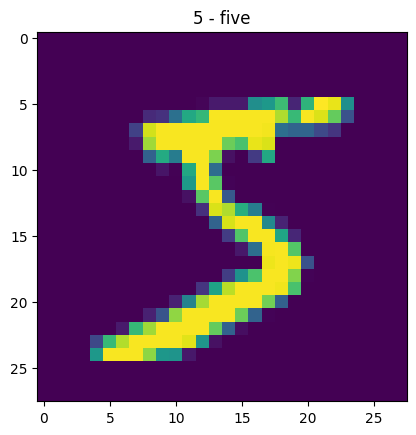

In [8]:
image, label = train_data[0]
image, label
plt.imshow(image.squeeze())
plt.title(class_names[label])

Text(0.5, 1.0, '5 - five')

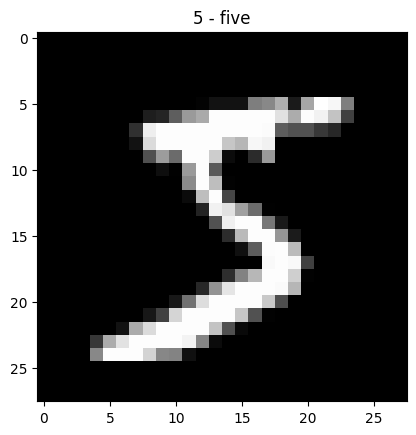

In [9]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

## Preparing DataLoader

In [10]:
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size= BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size= BATCH_SIZE, shuffle=False)


train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7db55b954750>,
 <torch.utils.data.dataloader.DataLoader at 0x7db55b8db250>)

In [11]:
train_features_batch , train_label_batch = next(iter(train_dataloader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, '8 - eight')

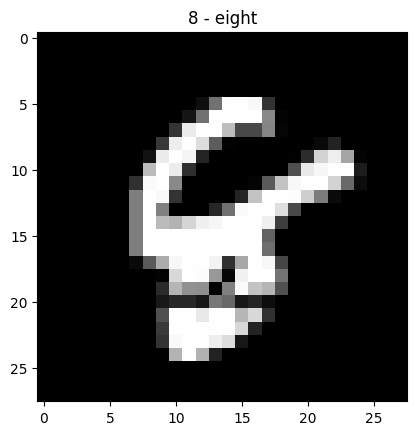

In [12]:
# show a sample

torch.manual_seed(42)

random_idx = torch.randint(1, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]

plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])

# 2) Build a base model

In [13]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)
output.shape


torch.Size([1, 784])

In [14]:
class MNISTModelV0(nn.Module):
  def __init__(self,
               input_shape : int,
               output_shape : int,
               hidden_units : int):

    super().__init__()
    self.layer_stack = nn.Sequential(

        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()


    )

  def forward(self, x):
    return self.layer_stack(x)


In [15]:
torch.manual_seed(42)


device = 'cpu'
model_0 = MNISTModelV0(input_shape=784,
                       output_shape=len(class_names),
                       hidden_units=10)
model_0.to(device)

MNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

# 3) Setup loss function and Optimizer

In [16]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [17]:
from helper_functions import accuracy_fn


loss = nn.CrossEntropyLoss()



op = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

## Training loop

In [18]:
from tqdm.auto import tqdm

torch.manual_seed(42)

epochs = 3

for epoch in tqdm(range(epochs)):

  print(f'epoch: {epoch} -----------------------------------------------------')

  train_loss , train_acc = 0,0
  for batch, (X,y) in enumerate(train_dataloader):

    #step 0
    model_0.train()

    #step 1: forward pass
    y_pred = model_0(X)

    #step 2: loss and acc

    ls = loss(y_pred,y)
    train_loss += ls

    acc = accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    train_acc += acc

    # step 3 : zero grad

    op.zero_grad()

    #step 4 : backpropagation
    ls.backward()

    #step 5: op

    op.step()

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  print(f'train_loss : {train_loss} - train_acc : {train_acc}')




  #testing
  model_0.eval()

  with torch.inference_mode():

    test_loss , test_acc = 0,0

    for X,y in test_dataloader:

      # step 1 forward pass
      y_test = model_0(X)

      #step 2

      ls_test = loss(y_test,y)
      test_loss += ls_test

      acc_test = accuracy_fn(y_true=y, y_pred=y_test.argmax(dim=1))
      test_acc += acc_test


    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print(f'test_loss : {test_loss} - test_acc : {test_acc}')

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0 -----------------------------------------------------
train_loss : 0.45602038502693176 - train_acc : 86.74666666666667
test_loss : 0.26451194286346436 - test_acc : 92.02276357827476
epoch: 1 -----------------------------------------------------
train_loss : 0.27126312255859375 - train_acc : 92.01666666666667
test_loss : 0.2366645485162735 - test_acc : 93.02116613418531
epoch: 2 -----------------------------------------------------
train_loss : 0.2401200830936432 - train_acc : 92.905
test_loss : 0.22132287919521332 - test_acc : 93.30071884984025


# 4) Setup a CNN

In [19]:
class MNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               output_shape: int,
               hidden_units : int):
    super().__init__()


    self.block_1 = nn.Sequential(

        nn.Conv2d(in_channels = input_shape,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels=hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                   stride = 2)

    )


    self.block_2 = nn.Sequential(

        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding= 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(2)

    )
    self.classifier = nn.Sequential(

        nn.Flatten(),
        nn.Linear(in_features = hidden_units*6*6,
                  out_features =output_shape )
    )

  def forward(self, x):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x


In [20]:
model_1 = MNISTModelV1(input_shape = 1,
                       output_shape = len(class_names),
                       hidden_units = 10)

model_1

MNISTModelV1(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=360, out_features=10, bias=True)
  )
)

## Seting up loss function and op

In [21]:
loss = nn.CrossEntropyLoss()
op = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

## Training and Tesing

In [22]:
from tqdm.auto import tqdm

epochs = 3

for epoch in tqdm(range(epochs)):

  train_loss, train_acc = 0,0

  for batch,(X,y) in enumerate(train_dataloader):

    #1
    model_1.train()

    #2
    y_pred = model_1(X)

    #3
    ls = loss(y_pred,y)
    train_loss += ls
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    #4
    op.zero_grad()

    #5
    ls.backward()

    #6
    op.step()

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  print(f'train_loss : {train_loss} |||||| train_acc : {train_acc}')




  #testing

  model_1.eval()
  with torch.inference_mode():

    test_loss, test_acc = 0,0

    for X,y in test_dataloader:

      #1
      y_test = model_1(X)


      #2
      test_y_loss = loss(y_test,y)
      test_loss += test_y_loss
      test_acc += accuracy_fn(y_true=y, y_pred=y_test.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)


  print(f'test_loss : {test_loss} |||||| test_acc : {test_acc}')

  0%|          | 0/3 [00:00<?, ?it/s]

train_loss : 0.29450058937072754 |||||| train_acc : 89.98166666666667
test_loss : 0.061377618461847305 |||||| test_acc : 97.83346645367412
train_loss : 0.0729231983423233 |||||| train_acc : 97.68833333333333
test_loss : 0.0523921437561512 |||||| test_acc : 98.23282747603834
train_loss : 0.05614275857806206 |||||| train_acc : 98.21166666666667
test_loss : 0.0448862686753273 |||||| test_acc : 98.47244408945687


In [23]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Run on Gpu

In [24]:
model_1.to(device)
from tqdm.auto import tqdm

epochs = 3

for epoch in tqdm(range(epochs)):

  train_loss, train_acc = 0,0

  for batch,(X,y) in enumerate(train_dataloader):
    X,y = X.to(device), y.to(device)
    #1
    model_1.train()

    #2
    y_pred = model_1(X)

    #3
    ls = loss(y_pred,y)
    train_loss += ls
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    #4
    op.zero_grad()

    #5
    ls.backward()

    #6
    op.step()

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  print(f'train_loss on Gpu : {train_loss} |||||| train_acc on Gpu: {train_acc}')




  #testing

  model_1.eval()
  with torch.inference_mode():

    test_loss, test_acc = 0,0

    for X,y in test_dataloader:
      X,y = X.to(device), y.to(device)
      #1
      y_test = model_1(X)


      #2
      test_y_loss = loss(y_test,y)
      test_loss += test_y_loss
      test_acc += accuracy_fn(y_true=y, y_pred=y_test.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)


  print(f'test_loss on Gpu : {test_loss} |||||| test_acc On Gpu: {test_acc}')

  0%|          | 0/3 [00:00<?, ?it/s]

train_loss on Gpu : 0.04840807244181633 |||||| train_acc on Gpu: 98.55
test_loss on Gpu : 0.04711884260177612 |||||| test_acc On Gpu: 98.31269968051119
train_loss on Gpu : 0.04318908229470253 |||||| train_acc on Gpu: 98.675
test_loss on Gpu : 0.050650909543037415 |||||| test_acc On Gpu: 98.3326677316294
train_loss on Gpu : 0.03912848234176636 |||||| train_acc on Gpu: 98.8
test_loss on Gpu : 0.04317207634449005 |||||| test_acc On Gpu: 98.66214057507987
